In [1]:
from LSSTmetrics import PerSNMetric
from LSSTmetrics.efficiencyTable import EfficiencyTable

In [2]:
import LSSTmetrics as metrics
print metrics.__file__

/Users/rbiswas/.local/lib/python2.7/site-packages/LSSTmetrics/__init__.pyc


In [3]:
from opsimsummary import summarize_opsim as oss

In [4]:
import pandas as pd
import sncosmo

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import os
import numpy as np
import copy

In [6]:
from lsst.sims.photUtils import BandpassDict

## Setup : Bandpasses

In [7]:
# Catsim bandpasses
lsst_bp = BandpassDict.loadTotalBandpassesFromFiles()

In [8]:
# sncosmo Bandpasses required for fitting
throughputsdir = os.getenv('THROUGHPUTS_DIR')

from astropy.units import Unit
bandPassList = ['u', 'g', 'r', 'i', 'z', 'y']
banddir = os.path.join(os.getenv('THROUGHPUTS_DIR'), 'baseline')

for band in bandPassList:

    # setup sncosmo bandpasses
    bandfname = banddir + "/total_" + band + '.dat'


    # register the LSST bands to the SNCosmo registry
    # Not needed for LSST, but useful to compare independent codes
    # Usually the next two lines can be merged,
    # but there is an astropy bug currently which affects only OSX.
    numpyband = np.loadtxt(bandfname)
    print band
    sncosmoband = sncosmo.Bandpass(wave=numpyband[:, 0],
                                   trans=numpyband[:, 1],
                                   wave_unit=Unit('nm'),
                                   name=band)
    sncosmo.registry.register(sncosmoband, force=True)

u
g
r
i
z
y


In [9]:
# You will have to download this file and change the value of the variable opsimHDF to the absolute path of this file on your disk:  http://lsst.astro.washington.edu/simdata/SN_data/storage.h5
opsimHDF = os.path.join(os.getenv('HOME'), 'data', 'LSST', 'OpSimData', 'storage.h5')
summarydf = pd.read_hdf(opsimHDF, 'table')
# df = df.query('propID == [364, 366]')

In [10]:
# Look at the output
summarydf.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,gamma,N0sq,alpha
0,1,1189,364,316,1.676483,-1.082473,y,2771,49353.032079,0,...,0,0,1.620307,0.000000,21.084291,1.643930,-1.108924,0.039924,0.000002,0.039924
1,2,1189,364,372,1.694120,-1.033972,y,2810,49353.032525,0,...,0,0,0.049266,4.542362,21.088257,1.664257,-1.060423,0.039924,0.000002,0.039924
2,3,1189,364,441,1.708513,-0.985271,y,2848,49353.032971,0,...,0,0,0.049298,4.561422,21.091100,1.680878,-1.011722,0.039924,0.000002,0.039924
3,4,1189,364,505,1.720374,-0.936476,y,2887,49353.033417,0,...,0,0,0.049266,4.570186,21.092714,1.694604,-0.962927,0.039924,0.000002,0.039924
4,5,1189,364,587,1.730248,-0.887672,y,2925,49353.033864,0,...,0,0,0.049177,4.568530,21.093091,1.706054,-0.914123,0.039924,0.000002,0.039924


In [11]:
# summarydf = summarydf.query('propID == [364, 366]').query('night < 365')

In [12]:
# Create the summary instance
so = oss.SummaryOpsim(summarydf)

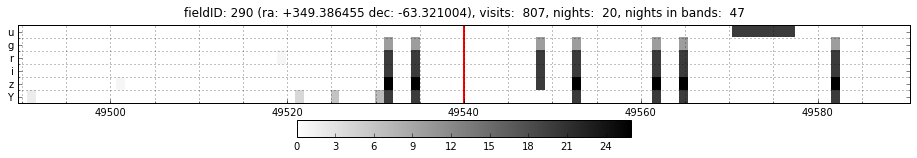

In [13]:
_ = so.cadence_plot(fieldID=290, mjd_center=49540)

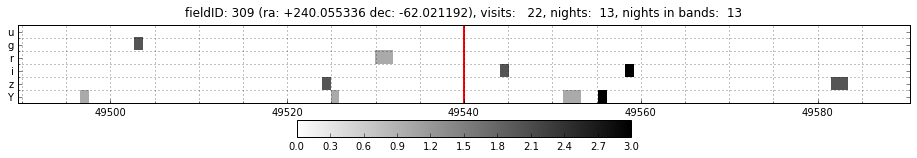

In [14]:
_ = so.cadence_plot(fieldID=309, mjd_center=49540)

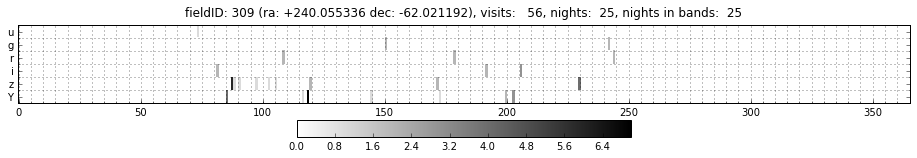

In [16]:
# 1st Season for a WFD field
_ = so.cadence_plot(fieldID=309, sql_query='night < 366')

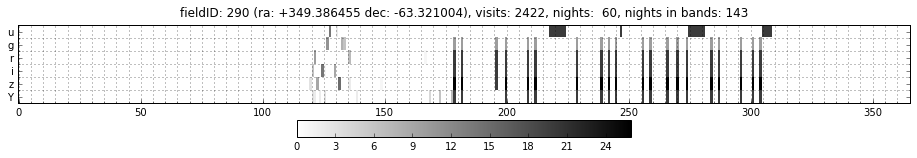

In [17]:
# 1st Season for a deep field
_ = so.cadence_plot(fieldID=290, sql_query='night < 366')

## Metrics

In [18]:
qm = PerSNMetric(fieldID=309, t0=49540, summarydf=summarydf, lsst_bp=lsst_bp)

/Users/rbiswas/.local/lib/python2.7/site-packages/LSSTmetrics/metrics.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lc['modelFlux'] = lc['flux']
/Users/rbiswas/.local/lib/python2.7/site-packages/LSSTmetrics/metrics.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lc['deviation'] = np.random.normal(size=len(lc['flux']))


(19, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slewDi

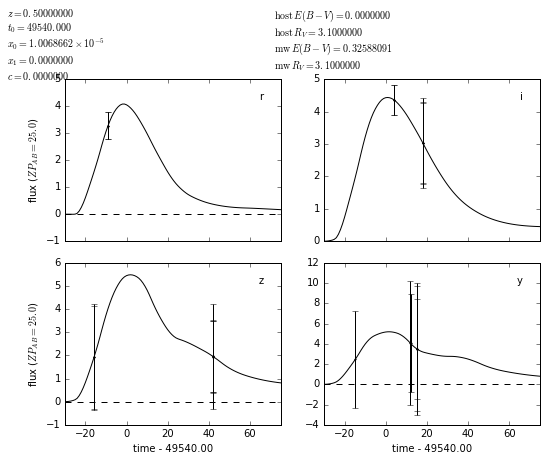

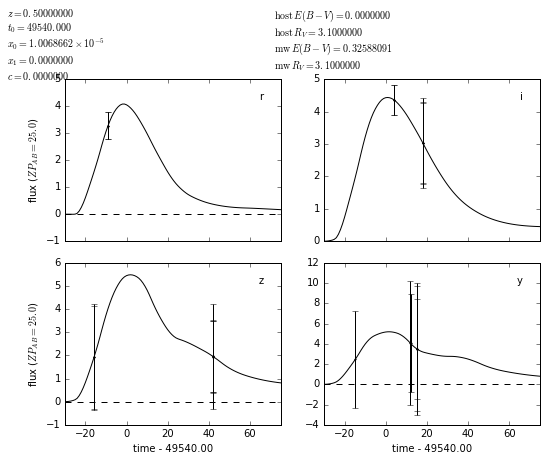

In [19]:
qm.lcplot()

(19, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slewDi

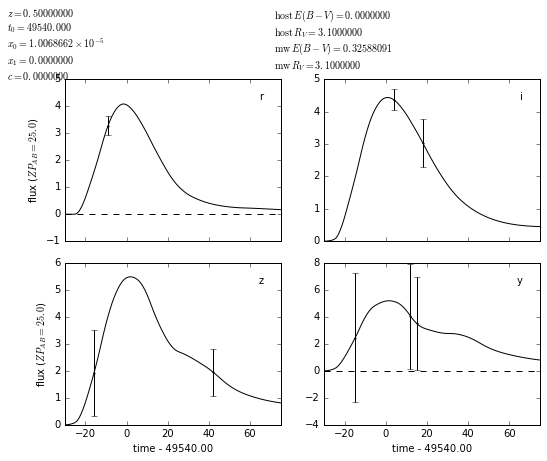

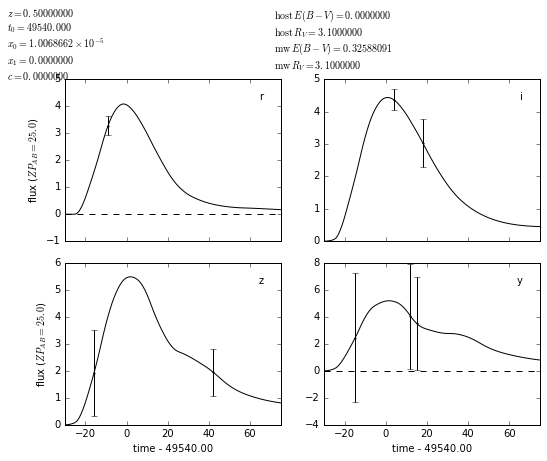

In [20]:
# Coadd the light curve 
qm.lcplot(nightlyCoadd=True)

In [34]:
#Let us see how this looks compared to fiveSigmaDepth
xx = qm.lightcurve[['time', 'band','flux', 'fluxerr', 'fiveSigmaDepth']].copy()

(19, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slewDi

In [26]:
xx['mag'] = -2.5 * np.log10(xx['flux'])

In [29]:
xx.groupby('band').get_group('i')

,time,band,flux,fluxerr,fiveSigmaDepth,mag
147681,49544.025007,i,4.361511e-10,4.592902e-11,24.111145,23.400908
147630,49544.001843,i,4.362569e-10,4.638890e-11,24.099905,23.400644
162503,49558.059849,i,3.030492e-10,1.234757e-10,23.020787,23.796217
162463,49558.041699,i,3.032675e-10,1.253292e-10,23.004614,23.795435
162578,49558.094256,i,3.026351e-10,1.388577e-10,22.893359,23.797702


In [29]:
# qm.writeLightCurve('coadded_lc.dat',nightlyCoadd=True)

### Now Look at a Deep Field

In [35]:
cm = PerSNMetric(fieldID=290, t0=49540, summarydf=summarydf, lsst_bp=lsst_bp)

(804, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slewD

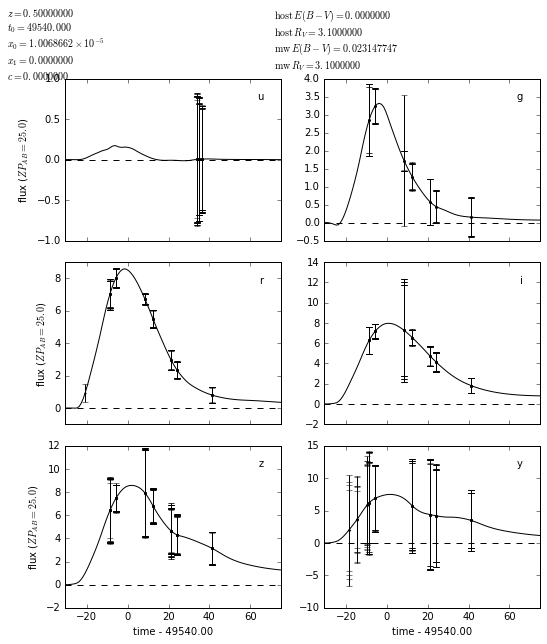

In [37]:
_ = cm.lcplot()

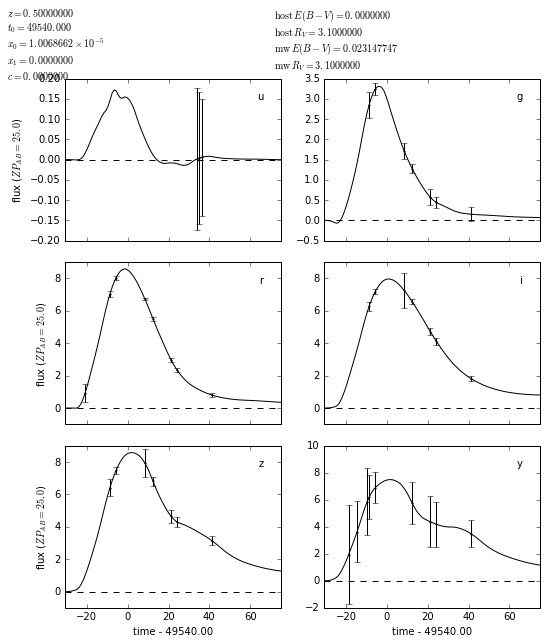

In [39]:
_ = cm.lcplot(nightlyCoadd=True)

In [43]:
yy = cm.lightcurve[['time', 'band','flux', 'fluxerr', 'fiveSigmaDepth']].copy()

(804, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slewD

In [45]:
yy['mag'] = -2.5 * np.log10(yy.flux)

In [46]:
yy

,time,band,flux,fluxerr,fiveSigmaDepth,mag
152756,49548.415128,r,6.729189e-10,3.110622e-11,24.578616,22.930093
152757,49548.415545,r,6.729068e-10,3.111954e-11,24.578089,22.930113
152758,49548.415961,r,6.728947e-10,3.113294e-11,24.577559,22.930132
152759,49548.416378,r,6.728826e-10,3.114642e-11,24.577026,22.930152
152760,49548.416795,r,6.728705e-10,3.116004e-11,24.576488,22.930171
152761,49548.417211,r,6.728584e-10,3.117374e-11,24.575947,22.930191
152762,49548.417628,r,6.728464e-10,3.118753e-11,24.575403,22.930210
152763,49548.418045,r,6.728343e-10,3.120140e-11,24.574856,22.930230
152748,49548.411795,r,6.730155e-10,3.141803e-11,24.566396,22.929937
152749,49548.412211,r,6.730035e-10,3.186211e-11,24.549239,22.929957


In [47]:
cm.SN.SNstate

{'MWE(B-V)': 0.023147746920585632,
 'ModelSource': 'salt2-extended',
 '_dec': -1.1051599999999999,
 '_ra': 6.097944,
 'c': 0.0,
 'hostebv': 0.0,
 'hostr_v': 3.1000000000000001,
 'mwebv': 0.0,
 'mwr_v': 3.1000000000000001,
 't0': 49540.0,
 'x0': 1.0068661711630977e-05,
 'x1': 0.0,
 'z': 0.5}

In [48]:
# Write Light Curve to Disk

In [49]:
cm.writeLightCurve('DDF_290_lc.txt')

(804, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slewD

In [50]:
!head DDF_290_lc.txt

index time band flux fluxerr zp zpsys SNR finSeeing airmass filtSkyBrightness fiveSigmaDepth propID night DetectionEfficiency modelFlux deviation
152756 49548.415128 r 6.72918866666e-10 3.11062193732e-11 0.0 ab 21.6329364424 0.717574 1.245747 21.120225 24.578616 366 195 nan 6.72918866666e-10 1.76405234597
152757 49548.415545 r 6.72906771426e-10 3.11195361099e-11 0.0 ab 21.6232905609 0.717749 1.246357 21.119823 24.578089 366 195 nan 6.72906771426e-10 0.400157208367
152758 49548.415961 r 6.72894705029e-10 3.11329363791e-11 0.0 ab 21.6135958663 0.717925 1.246971 21.119418 24.577559 366 195 nan 6.72894705029e-10 0.978737984106
152759 49548.416378 r 6.72882609463e-10 3.11464201362e-11 0.0 ab 21.6038506679 0.718102 1.24759 21.119011 24.577026 366 195 nan 6.72882609463e-10 2.2408931992
152760 49548.416795 r 6.72870513734e-10 3.11600383735e-11 0.0 ab 21.5940207027 0.718281 1.248214 21.118601 24.576488 366 195 nan 6.72870513734e-10 1.86755799015
152761 49548.417211 r 6.72858446849e-10 3.1173740